In [1]:
import sys
sys.path.append('..\install\lib')
import mnpy as mn
import reader
import metnum as metnum

import numpy as np
from matplotlib import pyplot
import sklearn.model_selection as sklms


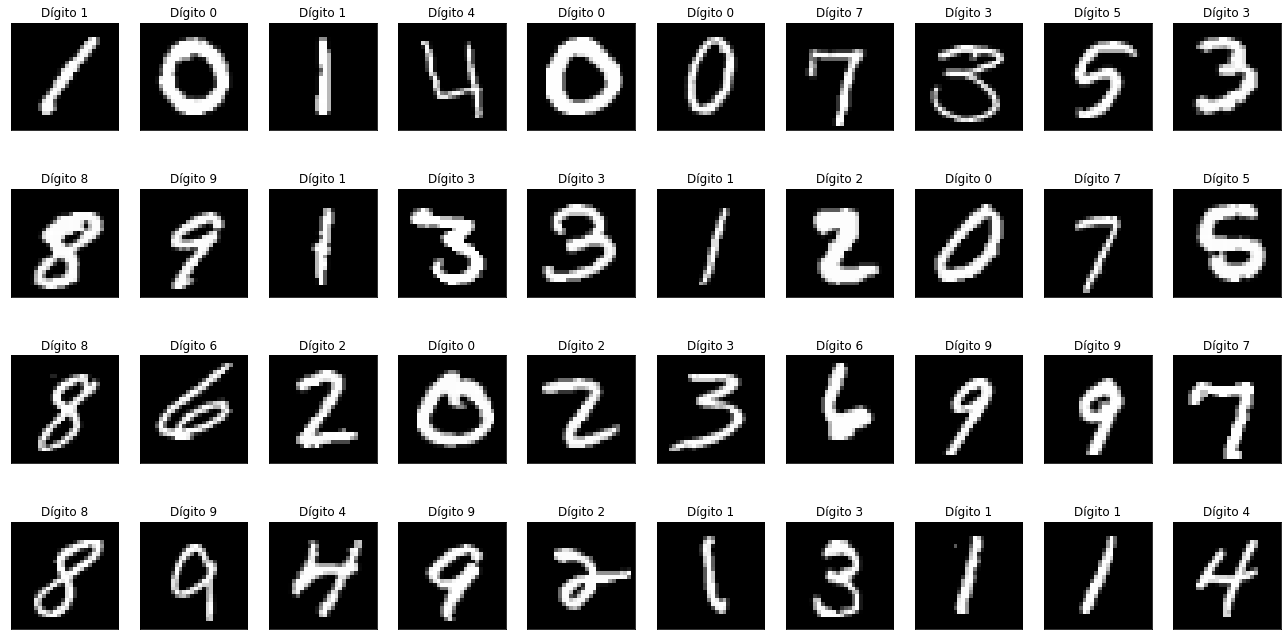

In [2]:
df = reader.read7Zip('../data/train.7z')
targets = df['label'].to_numpy()
# la primer columna es el label, el resto son los 28*28 pixeles de cada imagen
images = df.iloc[:, 1:].to_numpy()

cols = 10
rows = 4
samples = rows*cols
titles = ["Dígito %d" % digit for digit in targets[0:samples] ]
metnum.plot_gallery(images[0:samples], titles, 28, 28, rows, cols)
pyplot.show()

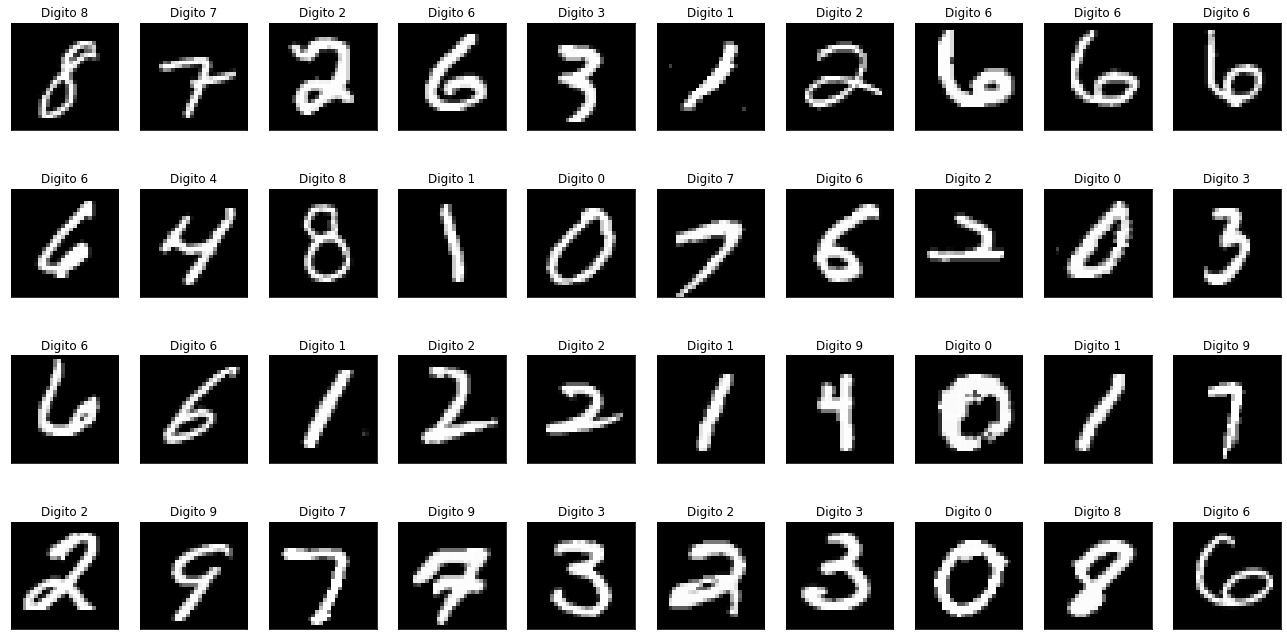

In [3]:
pca = mn.PCA(64, 120)
pca.tolerance_error = 0.000001
training_dataset = images[0:4000]
training_targets = targets[0:4000]

pca.fit(training_dataset)

knn = mn.kNNClassifier(4, mn.KNNWeights.Uniform)
knn.fit(pca.transform(training_dataset), training_targets)

predict_dataset = images[5000:5040]
predicted_tagets = knn.predict(pca.transform(predict_dataset))

titles = ["Digito %d" % digit for digit in predicted_tagets[0:samples] ]
metnum.plot_gallery(predict_dataset, titles, 28, 28, rows, cols)
pyplot.show()


In [4]:

df = reader.read7Zip('../data/train.7z')
targets = df['label'].to_numpy()
# la primer columna es el label, el resto son los 28*28 pixeles de cada imagen
images = df.iloc[:, 1:].to_numpy()

kfold = sklms.KFold(n_splits=10, shuffle=True)
n_components = [64]
iterated_powers = [128]
tolerance_errors = [0.0001]
k_neighbors = [4]
search = metnum.GridSearchCV(n_components, iterated_powers, tolerance_errors, k_neighbors, cv=kfold)
search.fit(images, targets)
print("Mejores parametros: ", search.best_params)
print("Todos los resultados: ", search.results)



KeyError: 'mean_score'